In [1]:
# import dependencies
# Python SQL toolkit and Object Relational Mapper
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import the dataset
file_path = '../Resources/work_hr.csv'
work_df = pd.read_csv(file_path)
work_df.head()

,date_created,time_created,values,ranges,day_sections,day_of_week
0,2022-03-28,18:44:22,96.0,normal,0,0
1,2022-03-28,18:45:04,105.0,normal,0,0
2,2022-03-28,18:45:09,98.0,normal,0,0
3,2022-03-28,18:45:14,100.0,normal,0,0
4,2022-03-28,18:45:19,100.0,normal,0,0


In [5]:
# Create 8 bins, spaced evenly
max_values = work_df['values'].max()
min_values = work_df['values'].min()
# get the difference and divide by the number of bins
values_spacing = (max_values - min_values)/8
values_bins = [1, 2, 3, 4, 5, 6, 7, 8]

#build bins
bins = []
for x in np.arange(min_values, max_values, values_spacing):
    bins.append(x)

# make first and last values larger/smaller to catch all
bins.append(205)
bins[0] = 40

bins

[40, 64.75, 84.5, 104.25, 124.0, 143.75, 163.5, 183.25, 205]

In [6]:
work_df["values_bins"] = pd.cut(work_df["values"], bins, labels=values_bins)
work_df["values_bins"].value_counts()

2    4762
3    3543
4    1471
1    1057
7     181
6     142
5     120
8      18
Name: values_bins, dtype: int64

In [7]:
ml_df = work_df[['values_bins', 'day_sections', 'day_of_week']]

In [8]:
target_df = ml_df[['values_bins']]
feature_df = ml_df[['day_sections', 'day_of_week']]

In [9]:
X = feature_df
y = target_df

In [10]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Linear Regression

In [11]:
# create a linear model
model_regression = LinearRegression()

In [12]:
# fit our model to the training data
model_regression.fit(X_train, y_train)

LinearRegression()

In [13]:
model_regression.score(X_test, y_test)

0.11271327363556771

## Random Forest Classifier

In [14]:
# Calculate feature importance in the Random Forest model.
model_rfc = RandomForestClassifier(random_state=1, n_estimators=100)
model_rfc.fit(X_train, y_train)

c:\Users\bmac9\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=1)

In [15]:
print(f'Training Score: {model_rfc.score(X_train, y_train)}')
print(f'Testing Score: {model_rfc.score(X_test, y_test)}')

Training Score: 0.47461629279811096
Testing Score: 0.48158640226628896


In [16]:
feature_importances = model_rfc.feature_importances_
feature_importances

array([0.41781806, 0.58218194])

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

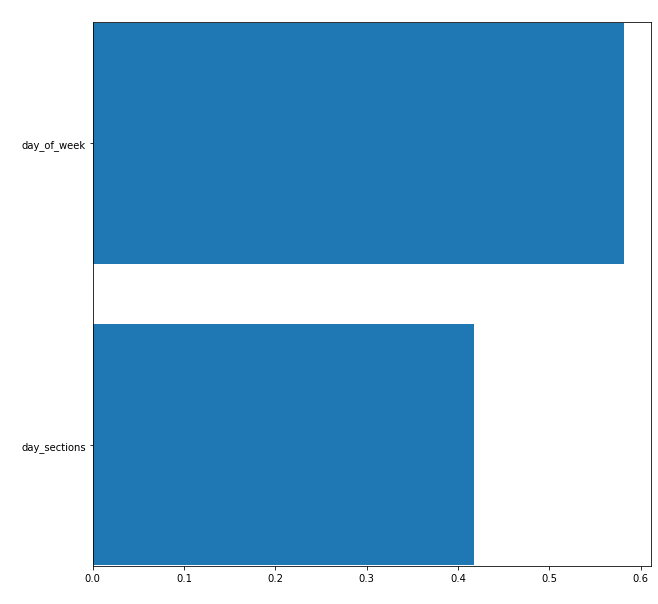

In [27]:
features = sorted(zip(X.columns, model_rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.set_title('Features by level of Importance', color='white')
ax.set_xlabel('Importance', color='white')
ax.set_ylabel('Feature', color='white')

ax.barh(y=cols, width=width)

plt.savefig('feature_import.png')

plt.show()

In [17]:
y_pred = model_rfc.predict(X_test)
y_pred

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

In [18]:
comparison_pd = X_test

In [19]:
comparison_pd['predicted_values'] = y_pred

In [20]:
comparison_pd = comparison_pd.join(y_test)

In [21]:
comparison_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 3784 to 8612
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   day_sections      2824 non-null   int64   
 1   day_of_week       2824 non-null   int64   
 2   predicted_values  2824 non-null   int64   
 3   values_bins       2824 non-null   category
dtypes: category(1), int64(3)
memory usage: 155.9 KB


In [22]:
comparison_pd[['predicted_values', 'values_bins']]

,predicted_values,values_bins
3784,2,2
4643,3,3
11253,2,1
1923,2,2
1839,2,1
...,...,...
4170,3,3
9723,2,2
2110,2,4
2375,2,2


In [23]:
print(comparison_pd['predicted_values'].value_counts())
print(comparison_pd['values_bins'].value_counts())

2    1719
3    1105
Name: predicted_values, dtype: int64
2    1181
3     904
4     355
1     270
7      49
6      33
5      29
8       3
Name: values_bins, dtype: int64
